# Exploring & Predicting Used Car Pricing in Python

## Prepared by

**Author:** Shinin Varongchayakul

**Date:** 15 Jun 2025

**Language:** Python

## Dataset

**Name:** Vehicle Dataset

**Source:** https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download

**Retrieved Date:** 15 Jun 2025

## 1. Load Libraries

In [2]:
# Load libraries
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data viz
import seaborn as sns # data viz

## 2. Load Dataset

In [3]:
# Load dataset
vehicles = pd.read_csv("vehicle_dataset.csv")

# Preview the first 10 rows
vehicles.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
# Get info
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**Comments:**
- No missing values.
- All columns in the correct data types.

In [5]:
# Get summary stats
vehicles.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


## 3. Explore Dataset

### 3.1 Handle Duplicates

In [6]:
# Check for duplicates
duplicates = vehicles.duplicated().sum()

# Print the result
print(f'Number of duplicates: {duplicates}')

Number of duplicates: 763


In [7]:
# View the duplicates
vehicles[vehicles.duplicated()].sort_values(by='name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
1835,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
1658,Volkswagen Polo Petrol Comfortline 1.2L,2013,400000,100000,Petrol,Individual,Manual,First Owner
2950,Volkswagen Vento 1.5 TDI Comfortline,2012,390000,45454,Diesel,Dealer,Manual,First Owner
2936,Volkswagen Vento 1.5 TDI Highline Plus AT,2017,890000,40219,Diesel,Dealer,Automatic,First Owner
3052,Volkswagen Vento Diesel Comfortline,2012,215000,97000,Diesel,Individual,Manual,First Owner


In [8]:
# Get original dimensions
vehicles.shape

(4340, 8)

In [9]:
# Drop the duplicates
vehicles_cleaned = vehicles.drop_duplicates()

# Check the dimensions
vehicles_cleaned.shape

(3577, 8)

### 3.1 Distribution of Selling Price

In [10]:
# Set sns palette and style

# Palette
sns.set_palette('colorblind')

# Style
sns.set_style('whitegrid')

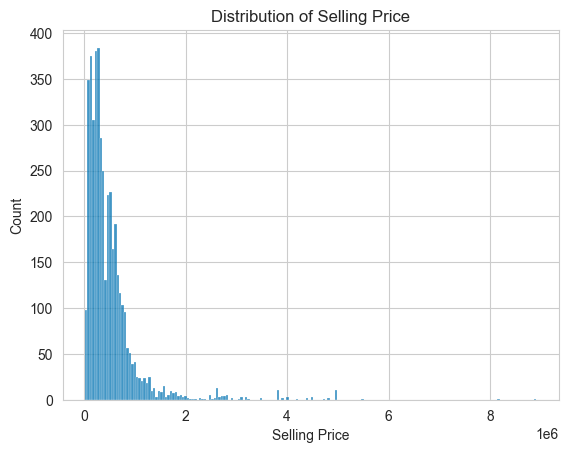

In [ ]:
# Create a histogram for `selling_price`

# Instantiate a histogram
sns.histplot(x='selling_price',
             data=vehicles,)

# Add title and label
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')

# Show the plot
plt.show()

**Comments:**
- Selling price is positively skewed.

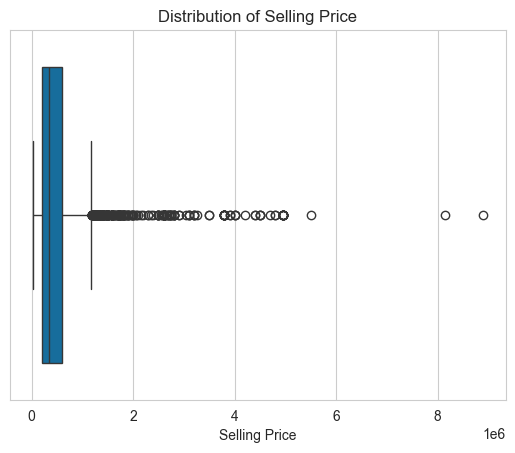

In [19]:
# Create a box plot for `selling_price`

# Instantiate a box plot
sns.boxplot(x='selling_price',
            data=vehicles,
            orient='h')

# Add title and label
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')

# Show the plot
plt.show()

### 3.2 Handle Outliers in Price

In [20]:
# Define a function
def rm_outliers(col):
    
    # Calculate Q3
    q3 = vehicles_cleaned[col].quantile(0.75)
    
    # Caulcate Q1
    q1 = vehicles_cleaned[col].quantile(0.25)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Define upper bound
    upper = q3 + (iqr * 1.5)
    
    # Define lower bound
    lower = q1 - (iqr * 1.5)
    
    # Filter out outliers
    vehicles_cleaned = vehicles_cleaned[(vehicles_cleaned[col] < lower & vehicles_cleaned[col] > upper)]